In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso


In [2]:
finish = pd.read_csv('./datasets/train_cleaned.csv')
test_clean = pd.read_csv('./datasets/test_cleaned.csv')

In [3]:
finish.columns

Index(['Id', 'SalePrice', 'Mo Sold', 'Yr Sold', 'Overall Qual', 'Overall Cond',
       'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF',
       '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Full Bath', 'Garage Yr Blt', 'Bedroom AbvGr', 'Mas Vnr Area.1',
       'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Lot Frontage', 'Open Porch SF', 'Wood Deck SF', 'Fence',
       'Pool Area', 'MS Zoning', 'Alley', 'Central Air', 'Low Qual Fin SF',
       'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'BsmtFin Type 1',
       'BsmtFin Type 2', 'Heating QC', 'Kitchen Qual', 'Fireplace Qu',
       'fine_neighbour', 'fine_garage_type', 'mv', 'garage_finish', 'zone1',
       'zone2', 'Grvl', 'Pave', 'VinylSd1', 'VinylSd2', 'Pconc', 'reg_lot',
       'np_bsmt_expo', 'sale_new', 'bsmtscore', 'garagescore'],
      dtype='object')

# Manuually Select Features

In [4]:
cols = [
#                  'Id',                 
                 'Overall Qual', 
                 'Overall Cond',
#                  'Yr Sold',
#                  'Mo Sold',
                 'Gr Liv Area', 
                 'zone1',
                 'zone2',
                 '1st Flr SF', 
#                  'Low Qual Fin SF',
                 'Bedroom AbvGr',

#                  'garagescore',
                 'garage_finish', 
                 'Garage Area',
                 'fine_garage_type',
#                  'Garage Cars', 
#                  'Garage Yr Blt', 

                 'Fence',
                 'Pool Area',

                 'Year Built',
#                  'Year Remod/Add',

#                  'Full Bath', 
#                  'Mas Vnr Area',
#                  'TotRms AbvGrd', 
#                  'Fireplaces', 
                 'Central Air',
#                  'BsmtFin SF 1',
#                  'BsmtFin Type 1',
#                  'BsmtFin SF 2',
#                  'BsmtFin Type 2',
#                  'Bsmt Unf SF',
                 'bsmtscore',
                 'Bsmt Qual',
                 'Total Bsmt SF', 
                 'np_bsmt_expo', 
                 'Lot Frontage',
                 'Open Porch SF', 
                 'Wood Deck SF', 
    
                 'Exter Qual', 
#                  'Exter Cond',
                 'Heating QC', 
                 'Kitchen Qual', 
                 'Fireplace Qu',
    
                 'fine_neighbour', 
#                  'mv', 
                 'VinylSd1', # 
#                  'VinylSd2', 
#                  'Pconc',
                 'reg_lot', 
                 'sale_new',
#                  'SalePrice'
]

X = finish.loc[:,cols]
y = np.log(finish['SalePrice'])

In [5]:
cols = [               
                 'Overall Qual', 
                 'Overall Cond',
#                  'Yr Sold',
#                  'Mo Sold',
                 'Gr Liv Area', 
                 'zone1',
                 'zone2',
                 '1st Flr SF', 
#                  'Low Qual Fin SF',
                 'Bedroom AbvGr',

#                  'garagescore',
                 'garage_finish', 
                 'Garage Area',
                 'fine_garage_type',
#                  'Garage Cars', 
#                  'Garage Yr Blt', 
#                  'Grvl',
#                  'Pave',
                 'Fence',
                 'Pool Area',

                 'Year Built',
#                  'Year Remod/Add',

#                  'Full Bath', 
#                  'Mas Vnr Area',
#                  'TotRms AbvGrd', 
#                  'Fireplaces', 
                 'Central Air',
#                  'BsmtFin SF 1',
#                  'BsmtFin Type 1',
#                  'BsmtFin SF 2',
#                  'BsmtFin Type 2',
#                  'Bsmt Unf SF',
                 'bsmtscore',
                 'Bsmt Qual',
                 'Total Bsmt SF', 
                 'np_bsmt_expo', 
                 'Lot Frontage',
                 'Open Porch SF', 
                 'Wood Deck SF', 
    
                 'Exter Qual', 
#                  'Exter Cond',
                 'Heating QC', 
                 'Kitchen Qual', 
                 'Fireplace Qu',
    
                 'fine_neighbour', 
#                  'mv', 
#                  'VinylSd1', # 
                 'VinylSd2', 
#                  'Pconc',
                 'reg_lot', 
                 'sale_new',
#                  'SalePrice'
]

X = finish.loc[:,cols]
y = np.log(finish['SalePrice'])

## 1. Use Scatter plot to select variables
comment out because take too much memory

In [6]:
# for i in X.columns:
#     plt.figure(figsize = (6,6))
#     plt.scatter(X[i],y)
#     plt.title(i)

## 2. Use Residual Plot and R2 to evaluate model

### 2.1 Function to calculated RMSE

In [7]:
def getrmse(X,y,model):
    ave = []
    for i in range(500):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        model.fit(X_train,y_train)
        ave.append((metrics.mean_squared_error(np.exp(y_test), np.exp(model.predict(X_test))))**0.5)
    return np.mean(ave) 

### 2.2 Function to create LR model

In [8]:
def lr_model(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
    model = LinearRegression()
    model.fit(X_train,y_train)
    res = model.predict(X_test) - y_test
    plt.scatter(res, y_test);
    rmse_ave = getrmse(X,y,model)
    print(f'train R2 is {cross_val_score(model, X_train, y_train, cv = 5).mean()}')
    print(f'test R2 is {cross_val_score(model, X_test, y_test, cv = 5).mean()}')
    print(f'RMSE Average is {rmse_ave}')
    return rmse_ave

### 2.3 Function to create Lasso model

In [9]:
def lasso_model(X,y,alpha = 0.1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
    model = Lasso(alpha = alpha)
    model.fit(X_train,y_train)
    res = model.predict(X_test) - y_test
    plt.scatter(res, y_test);
    rmse_ave = getrmse(X,y,model)
    print(f'train R2 is {cross_val_score(model, X_train, y_train, cv = 5).mean()}')
    print(f'test R2 is {cross_val_score(model, X_test, y_test, cv = 5).mean()}')
    print(f'RMSE Average is {rmse_ave}')
    return rmse_ave

### 2.4 Function to create Ridge model

In [10]:
def ridge_model(X,y,alpha = 0.1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
    model = Ridge(alpha = alpha)
    model.fit(X_train,y_train)
    res = model.predict(X_test) - y_test
    plt.scatter(res, y_test);
    rmse_ave = getrmse(X,y,model)
    print(f'train R2 is {cross_val_score(model, X_train, y_train, cv = 5).mean()}')
    print(f'test R2 is {cross_val_score(model, X_test, y_test, cv = 5).mean()}')
    print(f'RMSE is {rmse_ave}')
    return rmse_ave

### 2.5 Function to calculated best Alpha for Lasso and Ridge

In [11]:
def find_alpha(ran):
    parameters = {'alpha' :ran}
    ridge_regressor = GridSearchCV(Ridge(), parameters , scoring ='neg_mean_squared_error', cv = 5)
    lasso_regressor = GridSearchCV(Lasso(), parameters , scoring ='neg_mean_squared_error', cv = 5)
    ridge_regressor.fit(X,y)
    lasso_regressor.fit(X,y)
    print(f'Ridge Best Parameter is {ridge_regressor.best_params_}')
    print(f'Lasso Best Parameter is {lasso_regressor.best_params_}')
    return (ridge_regressor.best_params_['alpha'],lasso_regressor.best_params_['alpha'])

In [12]:
ridge_best, lasso_best = find_alpha([1e-5,3e-4,4e-4,5e-4,1e-3,1e-2,1e-1,1,3,4,5,6,7,8,10,20])

Ridge Best Parameter is {'alpha': 6}
Lasso Best Parameter is {'alpha': 0.0004}


### 2.6 Poly transform for some columns

In [13]:
# Define Xt as X test and sort
Xt = test_clean[cols +['Id']]
Xt = Xt.sort_values('Id')
Xt.drop('Id', axis = 1, inplace = True)

In [14]:
X.columns

Index(['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'zone1', 'zone2',
       '1st Flr SF', 'Bedroom AbvGr', 'garage_finish', 'Garage Area',
       'fine_garage_type', 'Fence', 'Pool Area', 'Year Built', 'Central Air',
       'bsmtscore', 'Bsmt Qual', 'Total Bsmt SF', 'np_bsmt_expo',
       'Lot Frontage', 'Open Porch SF', 'Wood Deck SF', 'Exter Qual',
       'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'fine_neighbour',
       'VinylSd2', 'reg_lot', 'sale_new'],
      dtype='object')

In [15]:
# Attempted Poly transform
poly_cols = ['bsmtscore',
             'Bsmt Qual',
             'Total Bsmt SF',
#              'np_bsmt_expo',
             'Bedroom AbvGr',
#              'Overall Qual',
             'Overall Cond',
             'Year Built',
#              'reg_lot',
#             '1st Flr SF',
#              'garage_finish',
#             'Garage Area',
#              'Fence',
#              'Pool Area',
#              'Exter Qual',
#              'Heating QC',
#              'Kitchen Qual',
#              'Fireplace Qu',
#              'zone1',
#              'zone2',
             
            ]
poly = PolynomialFeatures(include_bias=True)

# Us poly transform for X
X_poly = poly.fit_transform(X[poly_cols])
Xp = pd.DataFrame(X_poly,columns = poly.get_feature_names(cols))
Xp = pd.concat([X,Xp], axis = 1)

# Us poly transform for Xt
Xt_poly = poly.fit_transform(Xt[poly_cols])
Xtp = pd.DataFrame(Xt_poly,columns = poly.get_feature_names(cols))
Xtp = pd.concat([Xt,Xtp], axis = 1)

### Model 1 Linear Regression with X,y

train R2 is 0.9117748126383379
test R2 is 0.904065489076222
RMSE Average is 21794.33107700017


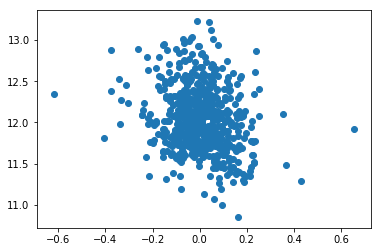

In [16]:
lr_rmse = lr_model(X,y)

### Model 2 Linear Regression with Xp(poly transform),y

train R2 is 0.9160793880985267
test R2 is 0.8976735928140599
RMSE Average is 21370.47390909844


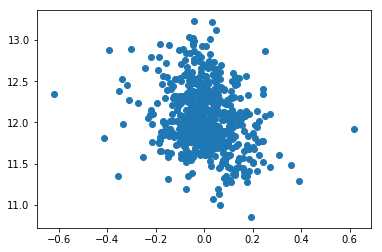

In [17]:
lr_p_rmse = lr_model(Xp,y)

### Model 3 Lasso with X,y

train R2 is 0.9121403816152117
test R2 is 0.9046185051996621
RMSE Average is 21761.913813796018


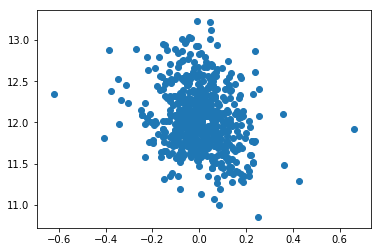

In [18]:
lasso_rmse = lasso_model(X,y,alpha = lasso_best)

### Model 4 Ridge with X,y

train R2 is 0.9121729153569996
test R2 is 0.9047604320766819
RMSE is 21723.701312179826


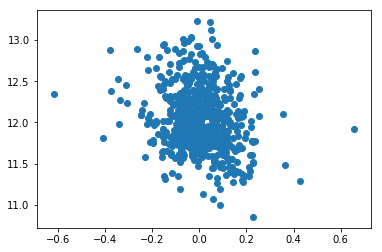

In [19]:
ridge_rmse = ridge_model(X,y,alpha = ridge_best)

In [20]:
rmse_all = [lr_rmse,lr_p_rmse,lasso_rmse,ridge_rmse]
models = ['lr','lrp','lasso','ridge']
print({models[i]:rmse_all[i] for i in range(4) if rmse_all[i] == np.min(rmse_all)})
print({models[i]:rmse_all[i] for i in range(4)})
    

{'lrp': 21370.47390909844}
{'lr': 21794.33107700017, 'lrp': 21370.47390909844, 'lasso': 21761.913813796018, 'ridge': 21723.701312179826}


## 3. Check the HeatMap for the X

Comment out because taking too much memory

In [21]:
# plt.figure(figsize = (20,10))
# sns.heatmap(X.corr(), annot = True, cmap = 'Greens');


## 4. Use OLS model to check P score

Comment out because taking too much space

In [22]:
# X['intercept'] = [1]*len(X)
# import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
# model1 = sm.OLS(y,X).fit()
# model1.summary()

## 5. Predict test data and save to file

In [23]:
model = LinearRegression()
# model = Lasso(alpha = 0.0001)
# model = Ridge(alpha = 5)

In [24]:
model.fit(Xp,y)
sub = np.exp(model.predict(Xtp))

In [25]:
submition = pd.read_csv('./datasets/sample_sub_reg.csv')
submition['SalePrice'] = sub

In [26]:
# submition.to_csv('./datasets/attempt_24.csv',index = False)